# Machine Learning Experiments

## Experiment-01: Fundamentals of Machine Learning

### Types of Learning

**1. Supervised Learning**
- Learns from labeled data (input + output)
- Examples: Linear Regression, Logistic Regression, SVM, Decision Tree
- Use: Classification, Regression

**2. Unsupervised Learning**
- Learns from unlabeled data (only input)
- Examples: K-Means, DBSCAN, PCA, Spectral Clustering
- Use: Clustering, Dimensionality Reduction

**3. Reinforcement Learning**
- Learns through rewards and penalties
- Examples: Q-Learning, Deep Q-Networks
- Use: Game AI, Robotics

---

### ML Workflow

1. **Data Collection** → Gather relevant data
2. **Data Preprocessing** → Clean, normalize, handle missing values
3. **Train-Test Split** → Divide data (typically 70-30 or 80-20)
4. **Model Selection** → Choose appropriate algorithm
5. **Training** → Fit model on training data
6. **Evaluation** → Test on unseen data
7. **Hyperparameter Tuning** → Optimize parameters
8. **Deployment** → Use model in production

---

### Overfitting vs Underfitting

| Aspect | Underfitting | Good Fit | Overfitting |
|--------|-------------|----------|-------------|
| **Training Accuracy** | Low | High | Very High |
| **Test Accuracy** | Low | High | Low |
| **Cause** | Model too simple | Just right | Model too complex |
| **Solution** | Add features, increase complexity | - | Regularization, more data, reduce complexity |

---

### Train-Test-Validation Split

- **Training Set (60-80%)**: Learn patterns
- **Validation Set (10-20%)**: Tune hyperparameters
- **Test Set (10-20%)**: Final evaluation (unseen data)

**Cross-Validation**: K-Fold splits data into k parts, trains k times

---

### Model Evaluation Metrics

**Classification:**
- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix, ROC-AUC

**Regression:**
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- R² Score (Coefficient of Determination)
- MAE (Mean Absolute Error)

---

### Applications of ML

- Healthcare: Disease prediction, medical imaging
- Finance: Fraud detection, stock prediction
- E-commerce: Recommendation systems
- NLP: Chatbots, translation, sentiment analysis
- Computer Vision: Face recognition, self-driving cars

## Experiment-02: Linear Regression

### Theory
**Linear Regression** is a supervised learning algorithm used for predicting continuous values. It models the relationship between input features (X) and output (y) using a linear equation.

**Equation:** $y = mx + c$ (simple) or $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$ (multiple)

**How it works:**
1. Finds the best-fit line that minimizes the distance between predicted and actual values
2. Uses **Least Squares Method** to minimize the cost function (Mean Squared Error)
3. Cost Function: $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$

**Key Metrics:**
- **MSE (Mean Squared Error)**: Average squared difference between predicted and actual values
- **R² Score**: Proportion of variance explained by the model (0 to 1, higher is better)

**Use Cases:** House price prediction, sales forecasting, trend analysis

Mean Squared Error: 4240.8156894071735, R^2: 0.3421467057149027


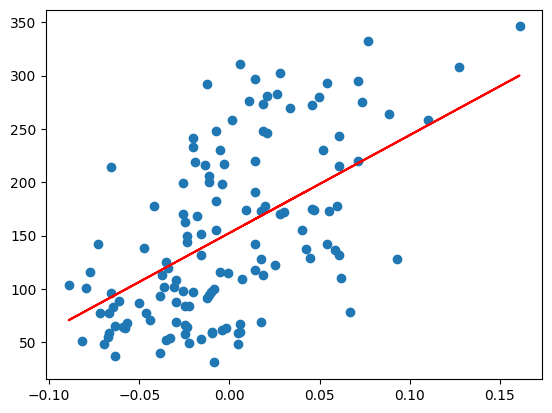

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

X, y= load_diabetes(return_X_y= True)
X= X[:, 2].reshape(-1, 1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

model= LinearRegression()
model.fit(X_train, y_train)
pred= model.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}, R^2: {r2_score(y_test, pred)}")

plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color="red")
plt.show()

## Experiment-03: Logistic Regression

### Theory
**Logistic Regression** is a supervised learning algorithm used for **classification problems** (not regression despite the name). It predicts the probability of an instance belonging to a particular class.

**Equation:** $P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$ (Sigmoid function)

**How it works:**
1. Uses the **Sigmoid/Logistic function** to map predicted values to probabilities (0 to 1)
2. If probability > 0.5 → Class 1, else → Class 0
3. Uses **Maximum Likelihood Estimation** to find optimal parameters
4. Cost function: **Log Loss** (Cross-Entropy)

**Types:**
- **Binary Classification**: 2 classes (e.g., spam/not spam)
- **Multiclass Classification**: >2 classes (uses One-vs-Rest or Softmax)

**Key Metrics:** Accuracy, Precision, Recall, F1-Score, Confusion Matrix

**Use Cases:** Email spam detection, disease diagnosis, customer churn prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



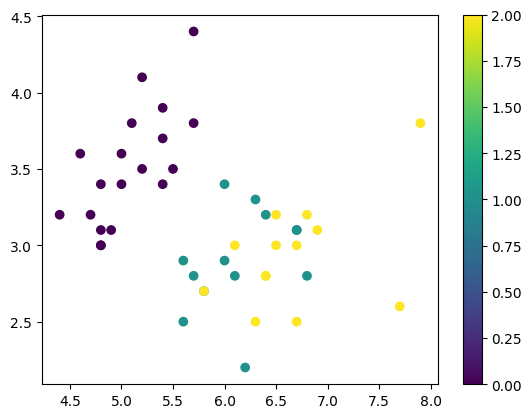

In [121]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X, y= load_iris(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=42)

model= LogisticRegression()
model.fit(X_train, y_train)

pred= model.predict(X_test)
print(classification_report(y_test, pred))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.colorbar()
plt.show()

## Experiment-04: Decision Tree (ID3/Gini)

### Theory
**Decision Tree** is a supervised learning algorithm that works for both classification and regression. It creates a tree-like model of decisions based on features.

**How it works:**
1. Splits data based on features that provide maximum **information gain**
2. Creates a tree structure with:
   - **Root Node**: Top decision node
   - **Internal Nodes**: Decision points
   - **Leaf Nodes**: Final predictions
3. Recursively splits until stopping criteria is met

**Splitting Criteria:**

**1. Gini Impurity** (Used in CART)
- Measures probability of incorrect classification
- Formula: $Gini = 1 - \sum_{i=1}^{n} p_i^2$
- Range: 0 (pure) to 0.5 (impure)

**2. Entropy (Used in ID3/C4.5)**
- Measures randomness/disorder in data
- Formula: $Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)$
- Information Gain = Entropy(parent) - Weighted Entropy(children)

**Advantages:** Easy to interpret, handles non-linear data, no feature scaling needed

**Disadvantages:** Prone to overfitting, sensitive to small data changes

**Use Cases:** Medical diagnosis, customer segmentation, loan approval

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [35, 32, 38]\nclass = virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 70\nvalue = [0, 32, 38]\nclass = virginica'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.239\nsamples = 36\nvalue = [0, 31, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.41666666666

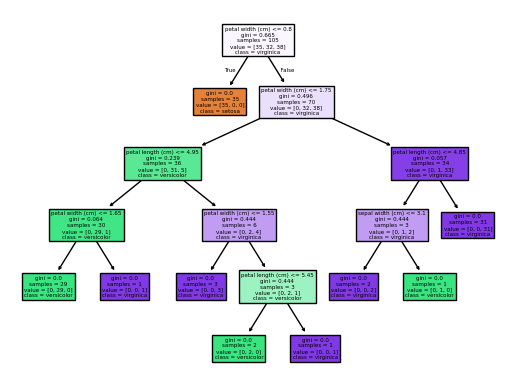

In [84]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

model= DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
pred= model.predict(X_test)

print(classification_report(y_test, pred))
plot_tree(model, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)

## Experiment-05: Confusion Matrix

### Theory
**Confusion Matrix** is a performance evaluation tool for classification algorithms. It's a table that visualizes the performance by comparing actual vs predicted values.

**Structure (Binary Classification):**

|  | Predicted Positive | Predicted Negative |
|---|---|---|
| **Actual Positive** | True Positive (TP) | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN) |

**Key Metrics Derived:**

1. **Accuracy** = $\frac{TP + TN}{TP + TN + FP + FN}$ → Overall correctness

2. **Precision** = $\frac{TP}{TP + FP}$ → Of all predicted positives, how many are correct?

3. **Recall (Sensitivity)** = $\frac{TP}{TP + FN}$ → Of all actual positives, how many did we catch?

4. **F1-Score** = $\frac{2 \times Precision \times Recall}{Precision + Recall}$ → Harmonic mean of precision and recall

5. **Specificity** = $\frac{TN}{TN + FP}$ → True negative rate

**When to use which metric:**
- **Accuracy**: Balanced datasets
- **Precision**: When false positives are costly (spam detection)
- **Recall**: When false negatives are costly (disease detection)
- **F1-Score**: Imbalanced datasets

**Use Cases:** Model evaluation, threshold selection, error analysis

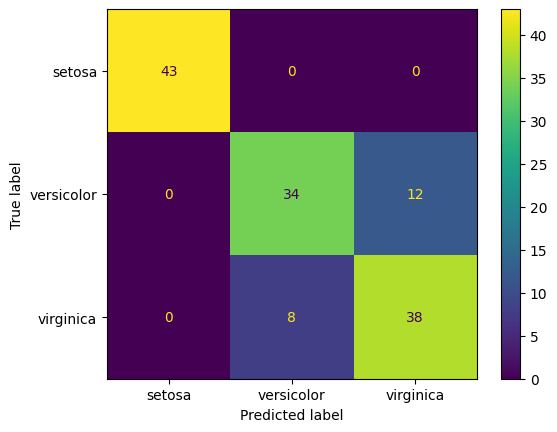

In [122]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, y= load_iris(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.9)

model= LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels= load_iris().target_names)
disp.plot()

## Experiment-06: Support Vector Machines (SVM)

### Theory
**SVM** is a supervised learning algorithm used for classification and regression. It finds the optimal **hyperplane** that best separates different classes with maximum margin.

**How it works:**
1. Finds a **decision boundary (hyperplane)** that maximizes the margin between classes
2. **Support Vectors**: Data points closest to the hyperplane (define the margin)
3. Maximizes the distance between support vectors of different classes

**Key Concepts:**

**1. Hyperplane**: Decision boundary that separates classes
- In 2D: Line
- In 3D: Plane
- In n-D: Hyperplane

**2. Margin**: Distance between hyperplane and nearest support vectors
- **Hard Margin**: No misclassification allowed (linearly separable data)
- **Soft Margin**: Allows some misclassification (C parameter controls trade-off)

**3. Kernel Trick**: Maps data to higher dimensions for non-linear separation
- **Linear Kernel**: For linearly separable data
- **RBF (Radial Basis Function)**: For non-linear data (most common)
- **Polynomial Kernel**: For polynomial decision boundaries
- **Sigmoid Kernel**: Similar to neural networks

**Advantages:** Effective in high dimensions, memory efficient, works well with clear margin

**Disadvantages:** Slow for large datasets, sensitive to feature scaling, choosing right kernel is tricky

**Use Cases:** Text classification, image recognition, face detection, handwriting recognition

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



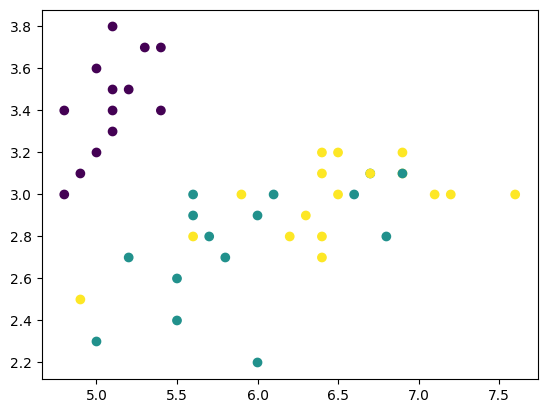

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y= load_iris(return_X_y= True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

model= SVC()
model.fit(X_train, y_train)
pred= model.predict(X_test)

print(classification_report(y_test, pred))

plt.scatter(X_test[:, 0], X_test[:, 1], c= y_test)
plt.show()

## Experiment-07: Random Forest

### Theory
**Random Forest** is an **ensemble learning** method that creates multiple decision trees and combines their predictions. It's based on **bagging (Bootstrap Aggregating)**.

**How it works:**
1. Creates multiple decision trees using random subsets of data (**bootstrap sampling**)
2. Each tree uses random subset of features at each split
3. For classification: **Majority voting** from all trees
4. For regression: **Average** of all tree predictions

**Key Concepts:**

**1. Bootstrap Sampling**: Random sampling with replacement from training data

**2. Feature Randomness**: Each tree considers only random subset of features for splitting

**3. Ensemble Method**: Combines weak learners (individual trees) to create strong learner

**Parameters:**
- **n_estimators**: Number of trees in forest (more = better but slower)
- **max_depth**: Maximum depth of each tree
- **min_samples_split**: Minimum samples required to split a node

**Advantages:**
- Reduces overfitting compared to single decision tree
- Handles missing values well
- Provides **feature importance** scores
- Works well with both categorical and numerical data

**Disadvantages:**
- Less interpretable than single decision tree
- Slower training and prediction
- Requires more memory

**Use Cases:** Credit scoring, recommendation systems, feature selection, stock market prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



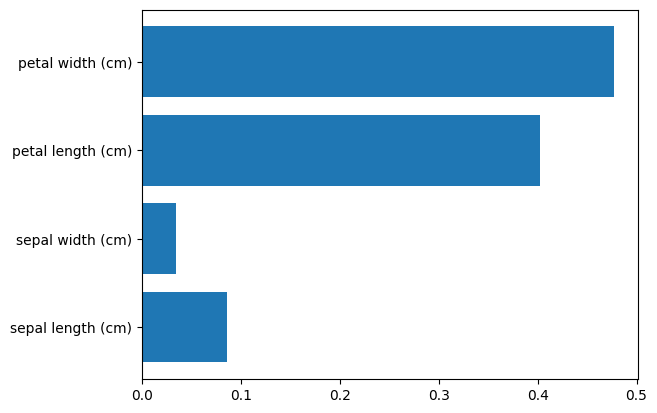

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y= load_iris(return_X_y= True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

model= RandomForestClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_test)

print(classification_report(y_test, pred))

importances= model.feature_importances_
features= load_iris().feature_names

plt.barh(features, importances)
plt.show()

## Experiment-08: Graph-Based Clustering (Spectral Clustering)

### Theory
**Spectral Clustering** is an **unsupervised learning** algorithm that uses graph theory and eigenvalues of similarity matrix to cluster data. It works well for non-convex clusters.

**How it works:**
1. Construct a **similarity graph** from data points
   - Nodes = data points
   - Edges = similarity between points
2. Compute the **Graph Laplacian matrix**
3. Find **eigenvalues and eigenvectors** of Laplacian
4. Use eigenvectors to represent data in lower dimension
5. Apply **K-Means** on eigenvector representation

**Key Concepts:**

**1. Affinity Matrix**: Measures similarity between all pairs of points
- **RBF (Gaussian) similarity**: $exp(-\gamma ||x_i - x_j||^2)$
- **Nearest Neighbors**: Connect k-nearest neighbors

**2. Graph Laplacian**: $L = D - A$
- D = Degree matrix (diagonal)
- A = Adjacency matrix

**3. Eigendecomposition**: Breaking down Laplacian into eigenvalues and eigenvectors

**Types of Similarity Graphs:**
- **ε-neighborhood graph**: Connect if distance < ε
- **k-nearest neighbor**: Connect k closest points
- **Fully connected**: All points connected with weights

**Advantages:**
- Handles non-convex clusters (unlike K-Means)
- Doesn't assume cluster shape
- Works well when clusters are connected manifolds

**Disadvantages:**
- Computationally expensive (eigendecomposition)
- Sensitive to scaling
- Need to choose number of clusters beforehand

**Use Cases:** Image segmentation, community detection in social networks, data with complex structure

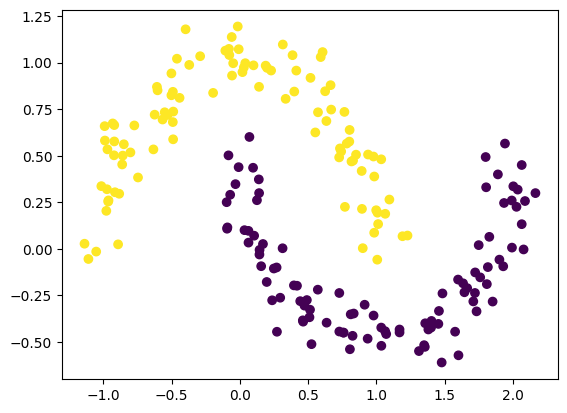

In [38]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering

X, y= make_moons(n_samples= 200, noise= 0.1, random_state= 142)

model= SpectralClustering(n_clusters= 2, affinity= "nearest_neighbors")
pred= model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c= pred)
plt.show()

## Experiment-09: DBSCAN (Density-Based Spatial Clustering)

### Theory
**DBSCAN** is a **density-based clustering** algorithm that groups points that are closely packed together and marks outliers as noise. Unlike K-Means, it **doesn't require specifying number of clusters** beforehand.

**How it works:**
1. For each point, check if it has enough neighbors within ε radius
2. Classify points as:
   - **Core point**: Has ≥ min_samples within ε radius
   - **Border point**: Within ε of core point but not core itself
   - **Noise/Outlier**: Not core or border
3. Connect core points that are within ε distance
4. Assign border points to nearest core point's cluster

**Key Parameters:**

**1. eps (ε)**: Maximum distance between two points to be neighbors
- Too small → Many clusters and noise
- Too large → Few large clusters

**2. min_samples**: Minimum points required to form dense region
- Higher value → More points labeled as noise
- Rule of thumb: min_samples ≥ dimensions + 1

**Advantages:**
- **Automatically finds number of clusters**
- Handles **arbitrary shaped clusters** (not just spherical)
- **Identifies outliers** as noise
- Robust to outliers

**Disadvantages:**
- Struggles with **varying densities**
- Sensitive to ε and min_samples parameters
- Not entirely deterministic (border points can switch clusters)

**Difference from K-Means:**
- K-Means: Partition-based, needs K, spherical clusters
- DBSCAN: Density-based, finds K, arbitrary shapes

**Use Cases:** Anomaly detection, geographic data clustering, spatial analysis, finding outliers

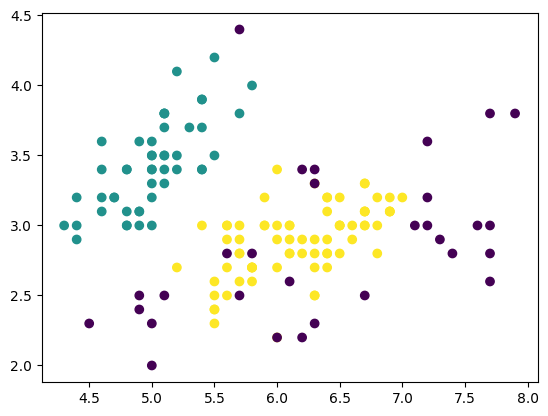

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y= load_iris(return_X_y= True)

model= DBSCAN(eps= 0.5, min_samples= 10)
pred= model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c= pred)
plt.show()

## Experiment-10: Principal Component Analysis (PCA)

### Theory
**PCA** is an **unsupervised dimensionality reduction** technique that transforms high-dimensional data into lower dimensions while preserving maximum variance. It's a **feature extraction** method.

**How it works:**
1. **Standardize** the data (mean = 0, variance = 1)
2. Compute the **covariance matrix** of features
3. Calculate **eigenvalues and eigenvectors** of covariance matrix
4. Sort eigenvectors by eigenvalues (descending order)
5. Select top k eigenvectors (principal components)
6. Transform original data using selected eigenvectors

**Key Concepts:**

**1. Principal Components (PCs)**: New orthogonal axes that capture maximum variance
- PC1: Direction of maximum variance
- PC2: Direction of second-most variance (perpendicular to PC1)
- And so on...

**2. Variance Explained**: How much information each PC captures
- Sum of all variance explained = 100%
- Usually keep PCs that explain 95%+ variance

**3. Dimensionality Reduction**: n features → k components (k < n)

**Mathematical Formulation:**
- Original data: $X$ (n × m)
- Principal components: $Z = XW$
- Where W contains eigenvectors

**Advantages:**
- **Reduces overfitting** (fewer features)
- **Speeds up training** (less computational cost)
- **Removes multicollinearity**
- **Helps visualization** (2D/3D plots from high-D data)

**Disadvantages:**
- **Less interpretable** (PCs are combinations of original features)
- Assumes **linear relationships**
- **Sensitive to scaling** (must standardize)

**Use Cases:** Image compression, data visualization, noise reduction, feature extraction, preprocessing for ML

pca.explained_variance_ratio_= array([0.92461872, 0.05306648])


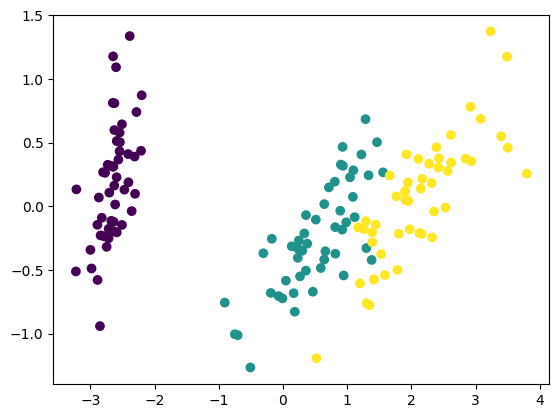

In [40]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X, y= load_iris(return_X_y= True)

pca= PCA(n_components= 2)
X_pca= pca.fit_transform(X)

print(f"{pca.explained_variance_ratio_= }")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y)
plt.show()